In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/DIABETES.csv", encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [3]:
# 목표 변수, 설명변수 데이터 지정
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data X size : {}".format(df_test_y .shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data X size : (133,)


In [5]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: -0.143


    MinSamplesLeaf  TrainScore  TestScore
0                1       1.000     -0.143
1                2       0.953     -0.111
2                3       0.878      0.039
3                4       0.836      0.083
4                5       0.773      0.062
5                6       0.730      0.042
6                7       0.707      0.107
7                8       0.669      0.109
8                9       0.649      0.144
9               10       0.614      0.203
10              11       0.610      0.188
11              12       0.591      0.231
12              13       0.587      0.229
13              14       0.582      0.236
14              15       0.571      0.254
15              16       0.563      0.284
16              17       0.555      0.334
17              18       0.552      0.336
18              19       0.535      0.335


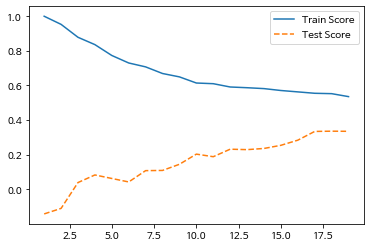

In [9]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)] #참조: para_leaf: [1,2,3,...,19]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

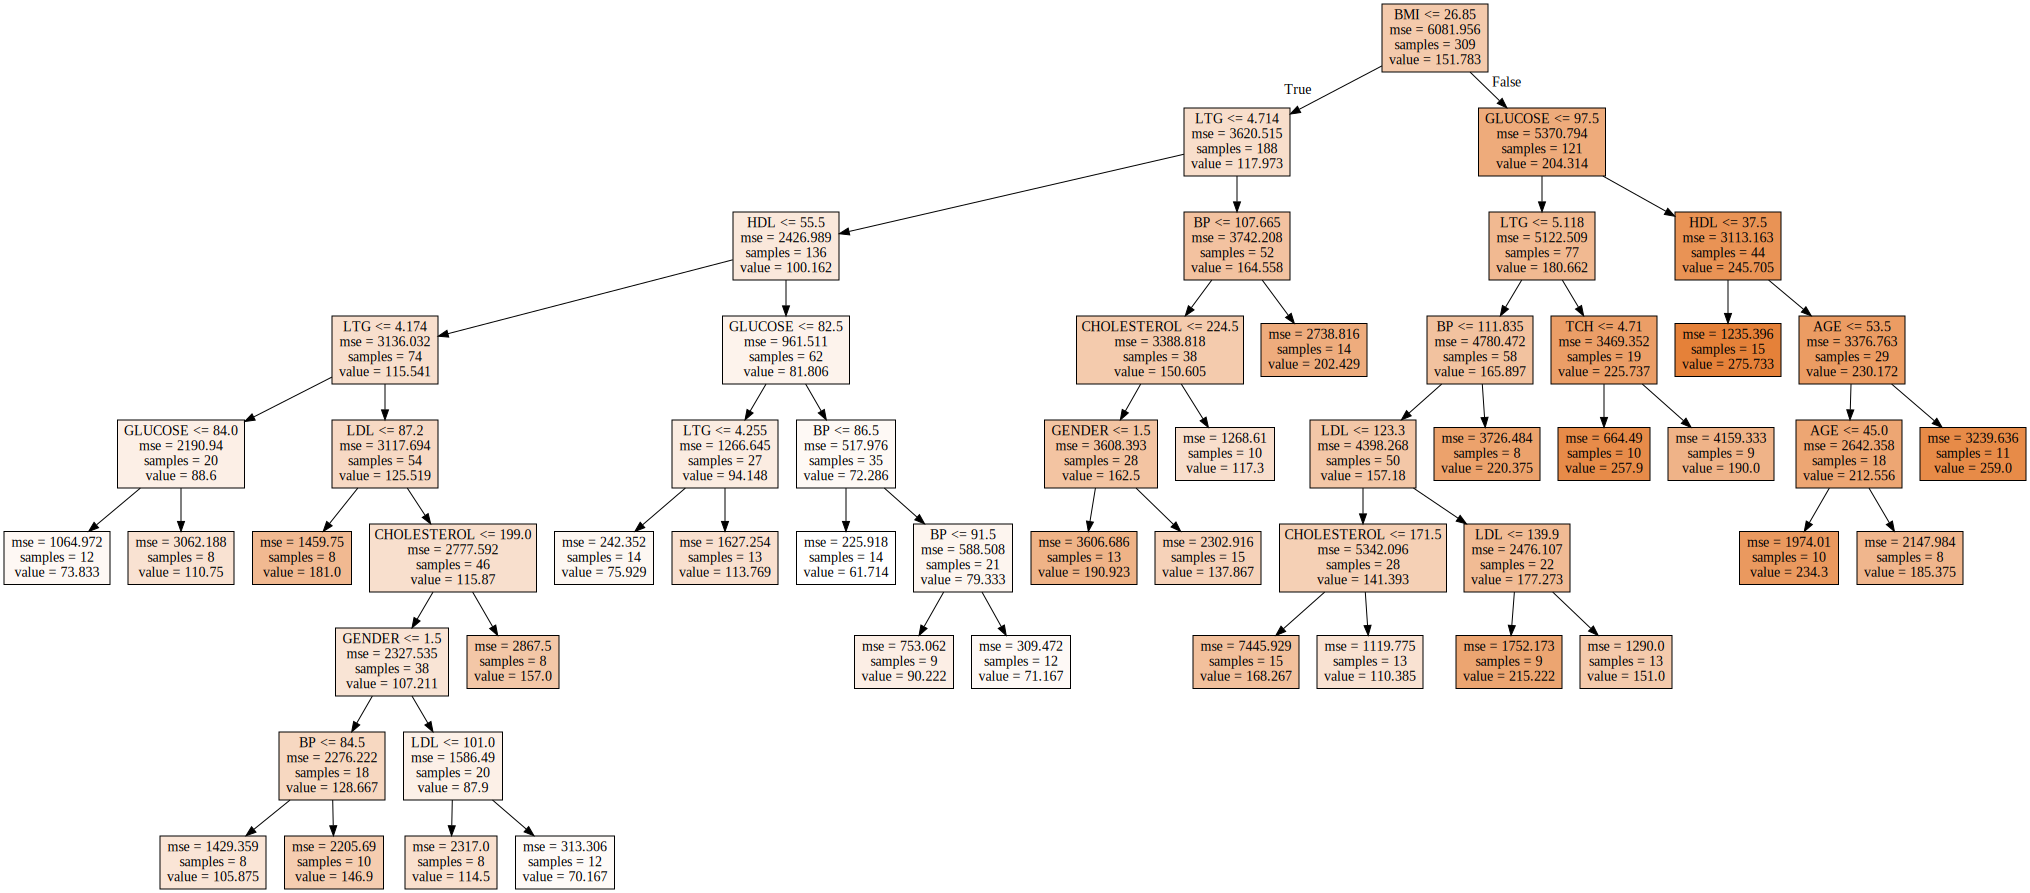

In [10]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 = 8 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

    MinSamplesSplit  TrainScore  TestScore
0                 2       0.438      0.351
1                 3       0.511      0.279
2                 4       0.556      0.264
3                 5       0.601      0.199
4                 6       0.634      0.157
5                 7       0.643      0.146
6                 8       0.648      0.142
7                 9       0.648      0.142
8                10       0.648      0.142
9                11       0.648      0.142
10               12       0.648      0.142
11               13       0.648      0.142
12               14       0.648      0.142
13               15       0.648      0.142
14               16       0.648      0.142
15               17       0.648      0.142
16               18       0.648      0.142
17               19       0.648      0.142


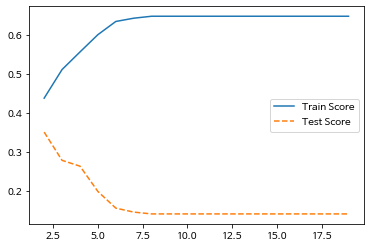

In [11]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_split = [n_split for n_split in range(2,20)]  # 참조: para_split: [2,6,8,...,38]

for v_min_samples_splt in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=20
                                 , max_depth= v_min_samples_splt)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

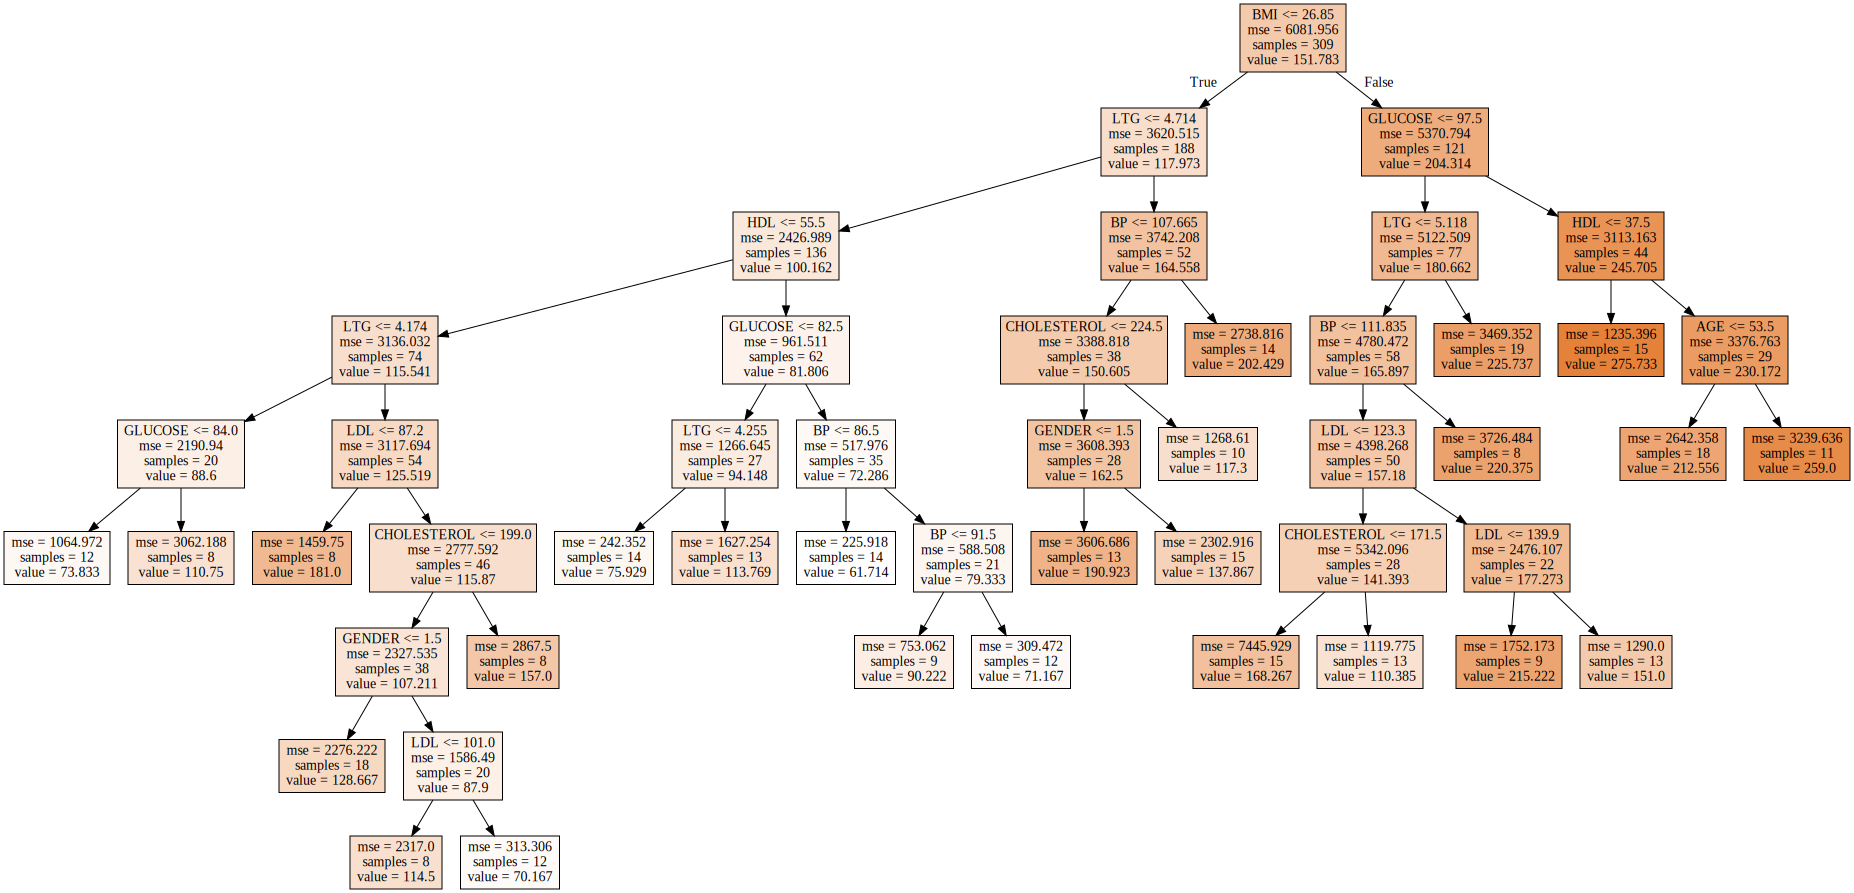

In [12]:
# 분리 노드의 최소 자료 수 = 20모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

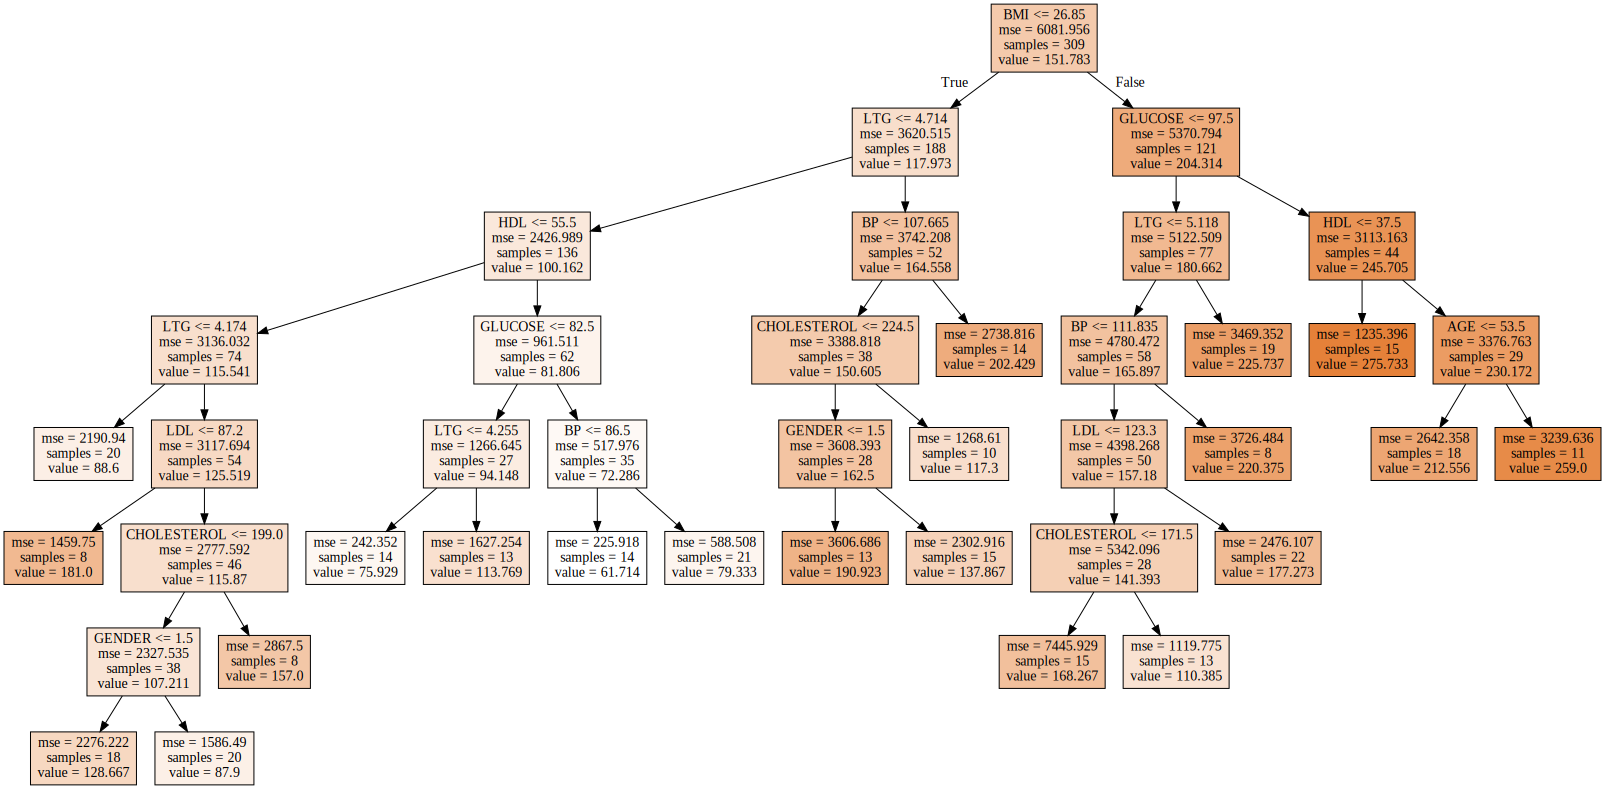

In [13]:
# 분리 노드의 최소 자료 수 = 20모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

   Depth  TrainScore  TestScore
0      1       0.292      0.231
1      2       0.438      0.351
2      3       0.511      0.279
3      4       0.556      0.264
4      5       0.601      0.199
5      6       0.634      0.157
6      7       0.643      0.146
7      8       0.648      0.142
8      9       0.648      0.142
9     10       0.648      0.142


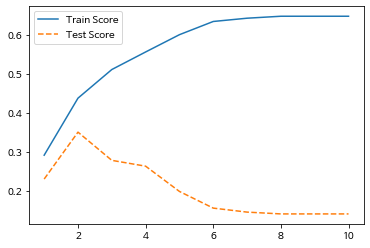

In [16]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]  # 참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=20
                                 , max_depth= v_max_depth)

    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))


# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

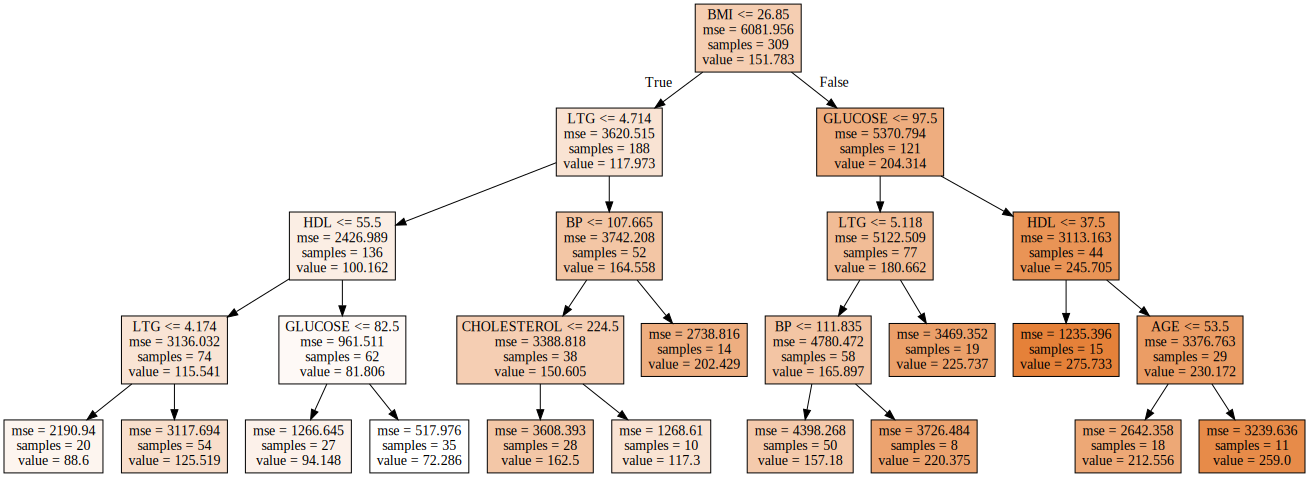

In [17]:
# 최대 깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=20, max_depth =4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],\
                            "max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='log2',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=13,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

best parameter: 
{'criterion': 'mse', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 13, 'min_samples_split': 9}

best score: 
0.388


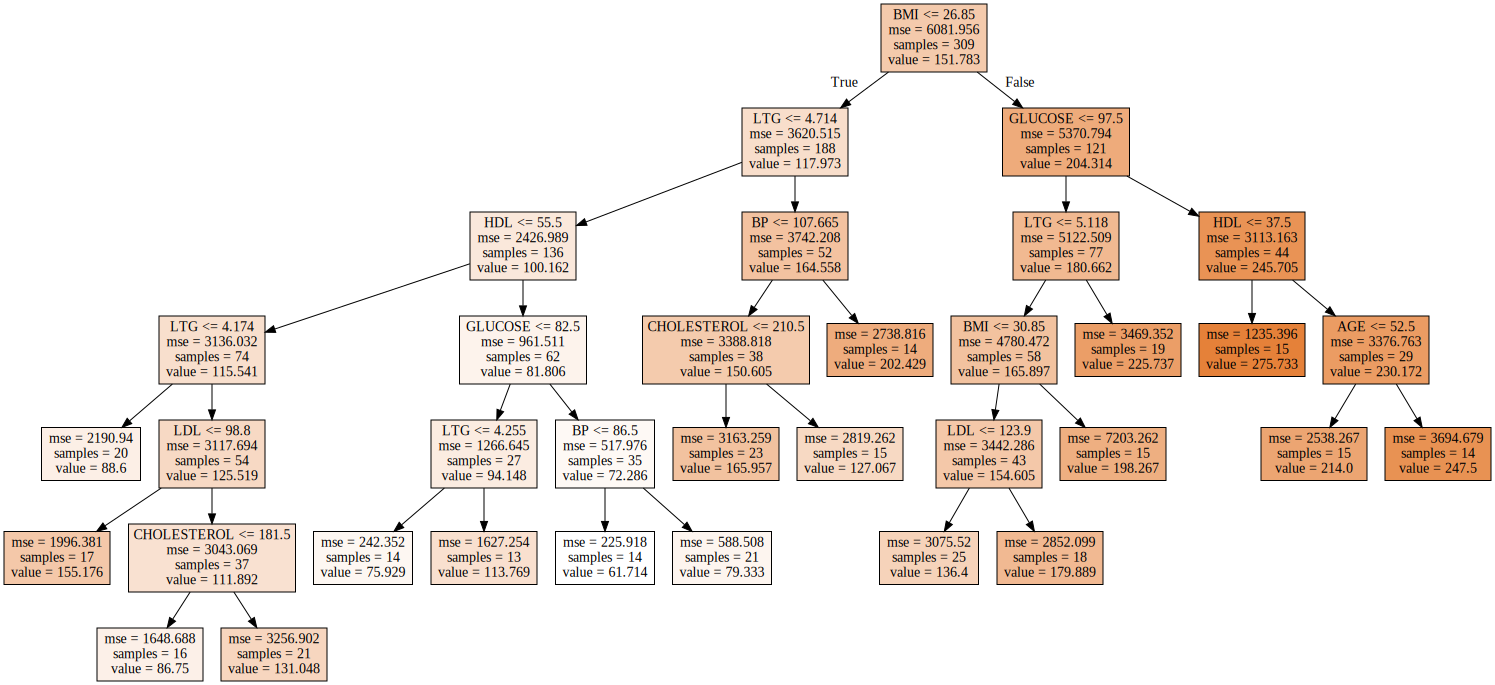

In [21]:
# 최대 깊이 = 2 모델
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 13, min_samples_split=9, max_depth =8)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_final2.dot",
               feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [22]:
# tree.feature_importances_로 설명변수 중요도 확인 및 데이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.517
8,LTG,0.215
9,GLUCOSE,0.114
6,HDL,0.053
5,LDL,0.038
4,CHOLESTEROL,0.029
3,BP,0.027
0,AGE,0.007
1,GENDER,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

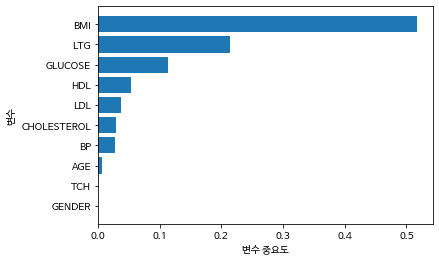

In [23]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [24]:
tree_final.score(df_test_x, df_test_y)

0.22886747083398862

In [25]:
tree_final.fit(df_train_x, df_train_y)
print(tree_final.score(df_train_x, df_train_y))
print(tree_final.score(df_test_x, df_test_y))

0.5868142295330736
0.22886747083398862
